<a href="https://colab.research.google.com/github/Kashish12471/Codealpha-tasks/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('/content/Advertising.csv')
print(df.head())
print(df.info())
print(df.describe())


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

Data Cleaning & Transformation

In [ ]:
print(df.isnull().sum())

df.rename(columns=str.strip, inplace=True)


if 'Platform' in df.columns:
    df = pd.get_dummies(df, columns=['Platform'], drop_first=True)


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


Exploratory Data Analysis (EDA)

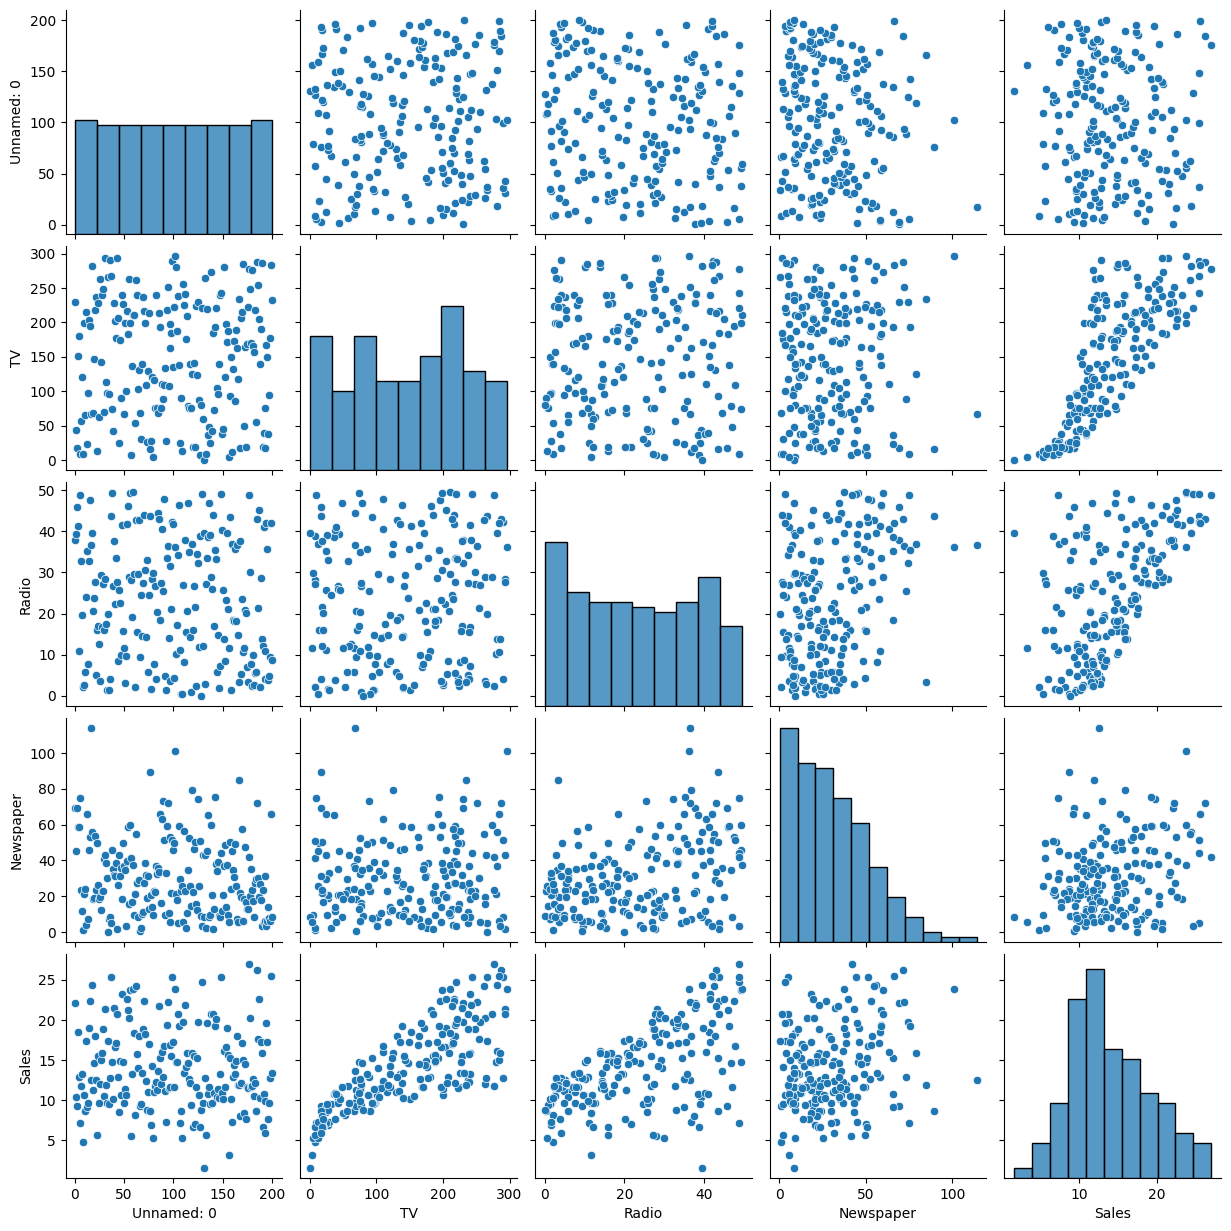

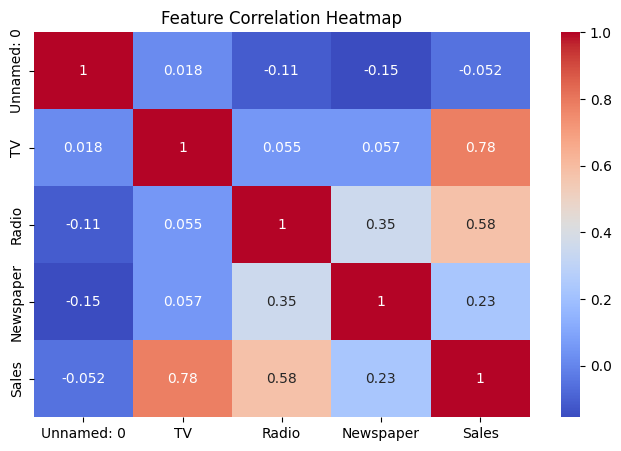

In [ ]:
sns.pairplot(df)
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Feature Selection & Train-Test Split

In [ ]:

X = df.drop('Sales', axis=1)
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Regression Model to Forecast Sales

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


Model Evaluation

R² Score: 0.898648915141708
RMSE: 1.7885761008659673


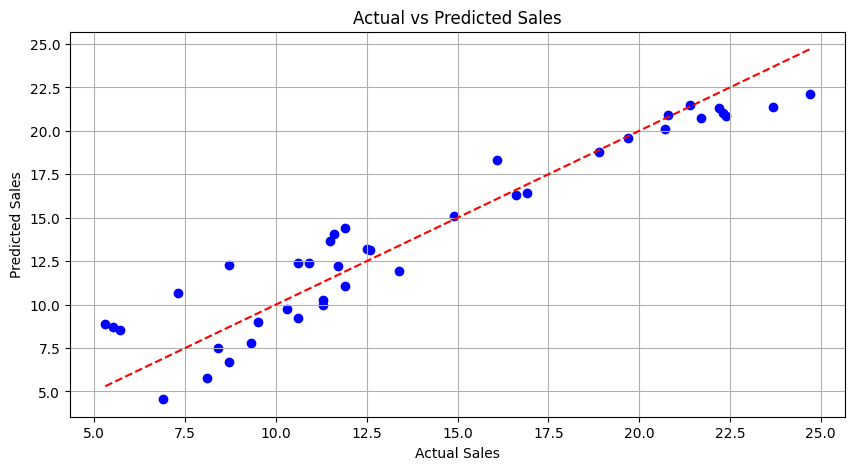

In [ ]:

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, c='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()


 Impact of Advertising Spend on Sales



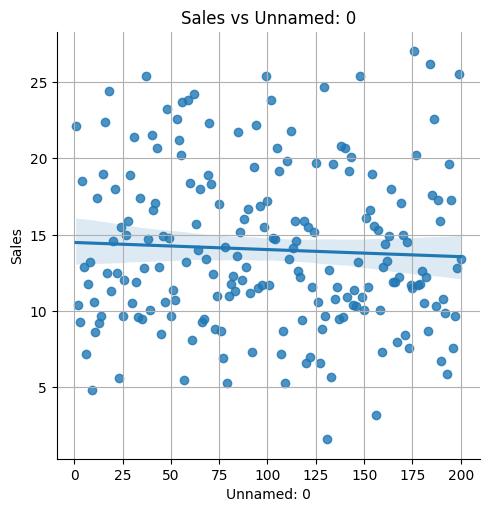

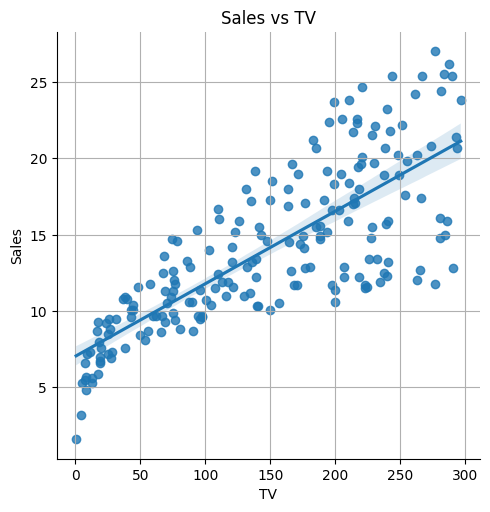

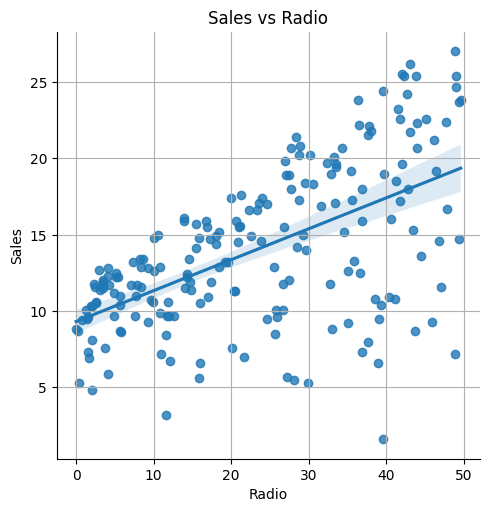

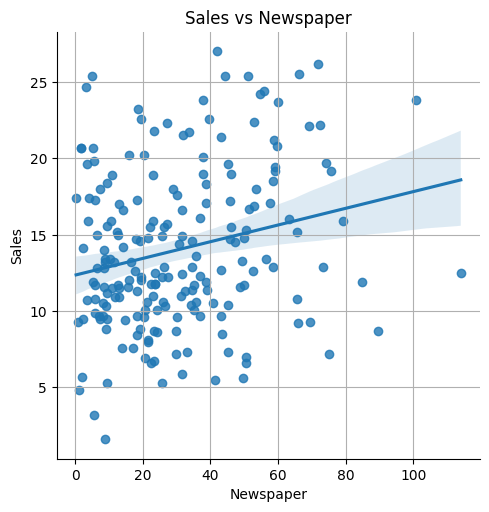

In [ ]:

for col in X.columns:
    sns.lmplot(data=df, x=col, y='Sales')
    plt.title(f'Sales vs {col}')
    plt.grid(True)
    plt.show()
